#Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#Loading Dataset

In [2]:
data= pd.read_csv('/content/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.drop(['PassengerId', 'Name',  'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'],axis= 1,inplace=True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#EDA- Data Visualization

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [8]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


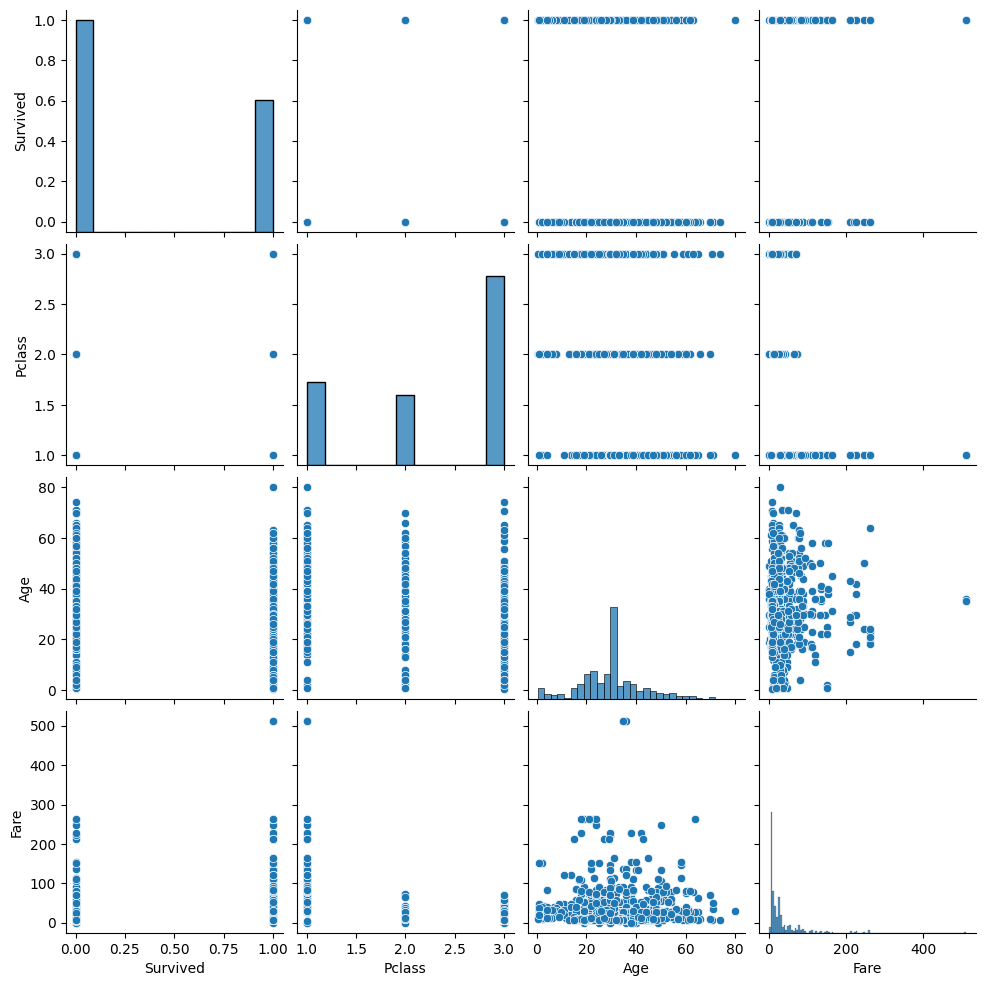

In [9]:
sns.pairplot(data)

In [10]:
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [11]:
corr=data.corr()

<ipython-input-11-c0bda979f113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

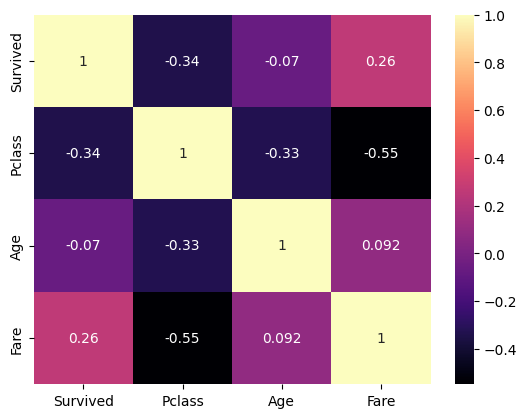

In [12]:
sns.heatmap(corr,cmap='magma',annot= True)

In [13]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

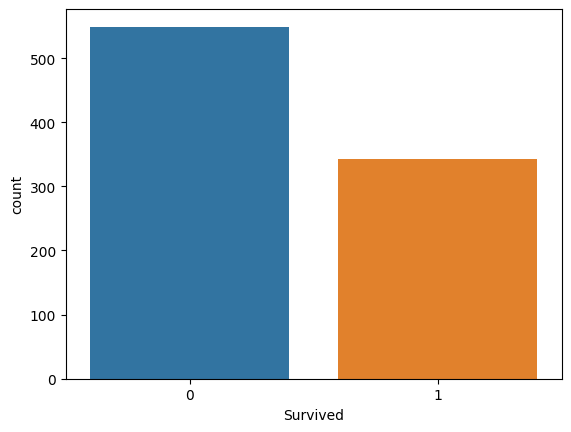

In [14]:
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

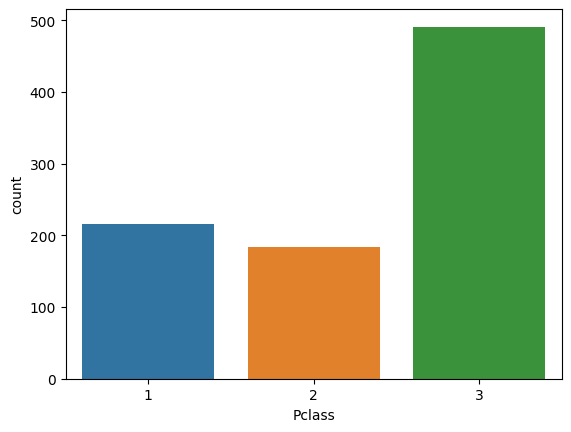

In [15]:
sns.countplot(x='Pclass', data=data)

<Axes: xlabel='Sex', ylabel='count'>

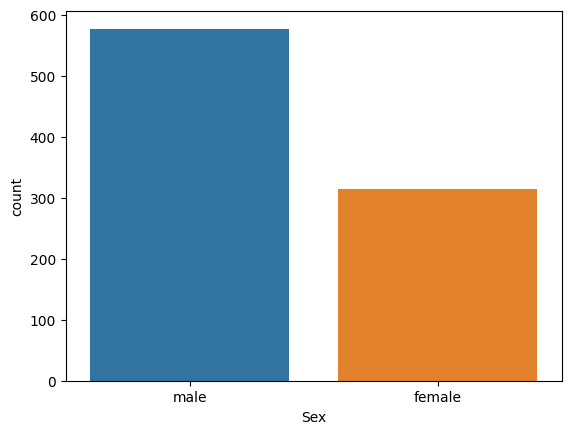

In [16]:
sns.countplot(x='Sex', data=data)

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
data['Sex']= data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes

In [19]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

#Independent & deopendent Variable

In [20]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [21]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#Splitting the dataset

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (668, 4)
X_test (223, 4)
y_train (668,)
y_test (223,)


#Model Building- Using GaussianNB,BernoulliNB,MultinomialNB

In [25]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [26]:
#Checking accuracy of testing data
y_pred_test=model.predict(X_test)

In [27]:
metrics.accuracy_score(y_test,y_pred_test)

0.7623318385650224

In [28]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       134
           1       0.69      0.73      0.71        89

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.76       223



In [29]:
print(confusion_matrix(y_test,y_pred_test))

[[105  29]
 [ 24  65]]


In [30]:
act_pred=pd.DataFrame({'Actual': y_test,'Predicted': y_pred_test})
act_pred

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
880,1,1
425,0,0
101,0,0
199,0,1


In [31]:
from sklearn.naive_bayes import MultinomialNB
model1= MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [32]:
#Checking Accuracy of testing data
y_pred_test1=model1.predict(X_test)

In [33]:
metrics.accuracy_score(y_test,y_pred_test1)

0.7174887892376681

In [34]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       134
           1       0.70      0.51      0.59        89

    accuracy                           0.72       223
   macro avg       0.71      0.68      0.69       223
weighted avg       0.72      0.72      0.71       223



In [35]:
print(confusion_matrix(y_test,y_pred_test1))

[[115  19]
 [ 44  45]]


In [36]:
from sklearn.naive_bayes import BernoulliNB
model2= BernoulliNB()
model2.fit(X_train,y_train)

BernoulliNB()

In [37]:
#Checking Accuracy of testing data
y_pred_test2=model2.predict(X_test)

In [38]:
metrics.accuracy_score(y_test,y_pred_test2)

0.7847533632286996

In [39]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [40]:
print(confusion_matrix(y_test,y_pred_test2))

[[112  22]
 [ 26  63]]


**Lets test our model with new data**

In [41]:
#Pclass,Sex,Age,Fare
test_data=[[1,0,24.000000,112.3401]]
prediction=model.predict(test_data)
if prediction[0]==0:
  print('Not Survived')
else:
  print('Survived')

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [42]:
#Pclass,Sex,Age,Fare
test_data=[[1,0,24.000000,112.3401]]
prediction=model1.predict(test_data)
if prediction[0]==0:
  print('Not Survived')
else:
  print('Survived')

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [43]:
#Pclass,Sex,Age,Fare
test_data=[[1,0,24.000000,112.3401]]
prediction=model2.predict(test_data)
if prediction[0]==0:
  print('Not Survived')
else:
  print('Survived')

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
